### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2018 ###

# Madison E-commerce Company Daily Delivery Optimization#

### Vehicle Routing Problem with Time Windows ###

#### Zhengyun Dou (zdou4@wisc.edu), Kai Wu (kwu68@wisc.edu), Yu-Hsin Chen (chen743@wisc.edu), and Stuti Pandey (studi.pandey@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

Have you ever worried about not being able to accept your package while you’re not home? Have you ever experienced having to pick up packages at delivery station because you’re not home when the delivery came? E-commerce changes the way how people shop. It enables people to purchase desired products within the convenience of their home and without the hassle of finding transportation. On the other hand, the traditional shopping fashion, such as supermarket and grocery store, provides the convenience for customers to get what they want whenever they are available. However, in e-commerce, this often is not the case because the delivery usually is arranged according to the e-commerce company's schedule instead of the customers'. Fedex, for instance, only delivers your package three times before it is kept in the station for five days. After five days, the package will be returned.       

Supply chain nowadays is not just transporting goods from one place to another. It is more about how it can be done in the most efficient and cost effective way. With our background knowledge of Supply chain,in our project, we are aiming to run an e-commerce company at Madison. The customers we are addressing are focussed on the time related service levels. If any other competitor company can deliver the goods to their customer at a certain desired time period while we can’t, we may lose our customer. Thus, our core value of the company is customer service. We are trying to deliver products to customers at their desired time periods. In other words, every customer of our company has a time window, which defines the period of time that customer is available to receive the package. This is an extension of Vehicle Routing Problem (VRP), which is dealing with efficient delivery to each point which demands are associated with it (in our case, customer) as each vehicle has a specific capacity. Our problem with time constraints to each customer is named as Vehicle Routing Problem with Time Windows (VRPTW with [citations](https://www.sciencedirect.com/science/article/pii/S1018364710000297)). In addition to the truck capacity constraint, a vehicle now has to visit a customer within a certain time frame.     

We are considering three scenarios which are explained in the Mathematical model with the variables and constraints laid out.With this Mathematical model in place, we move on to modelling this code in Julia and displaying our Optimized solution,followed by the results and conclusion of the model.      

Also, the data we have taken is not real data but dummy data. Since the model works for the dummy data, we can do real data implementation for real world problems in future.


## 2. Mathematical model ##

#### Overall Assumptions: ####
  
a. Our warehouse is at "location 1", where every truck leaves from and returns to;   
b. we have infinite trucks or the trucks can definitely satisfy customers' demand (Can be violated in Scenario 3);    
c. The trucks’ capacity cannot be violated;   
d. The speed of all the trucks are the same (100 km/h)  
e. Every customer has only one time window;  
f. Every customer is visited only once;  
g. A customer's demand can not be subdivided and delivered by multiple trucks;
j. The service time for each customer is 0.   
i. The distance among customers and the warehouse, and the demand of each customer are    deterministic.  
j. Each customer has to be visited within its time window.(Can be violated in Scenario 3)

#### Scenario Assumptions: ####

Based on these assumptions, we are going to explore the solutions in three scenarios, each secnario deals with a type of delivery:    

**Scenario 1:** Single type of item, single truck size, the time window of each customer MUST be met, arriving earlier or later is not allowed. In this scenario, we formulate the problem as a easy version which usually happens in a company with high volume low variety production business, like a motor supplier. The objective is to find a solution that minimize the overall cost and the starting service time of each route with satisfying all the constraints.  

**Scenario 2:**  Multiple types of items with different weights delivered by different types of trucks, each truck has its own weight limitations. We increase the complexity of our model to apply on low volume high variety production companies, like amazon and ebay. In this section, we can see the how the route will change after modifying the model.

**Scenario 3:**  Allows violating time windows with introducing penalty coefficient. In scenario one and two, we model the delivery system for two different types of companies. However, in real world, we can’t guarantee to satisfy all the customer demands. So, we introduce the penalty to our model. If the car arrives earlier, the delivery person has to wait until the time window starts to deliver. If the delivery person arrives later that the the window, reimbursement is made. The longer the delay is the more we have to compensate. Thus, forming a tradeoff between the driving distance cost and delay compensation cost. In this model, you can see the delayed customers and optimal solution generated by our model.   


### 2.1 Models ###

#### Scenario 1: ####

**Parameter Sets:** 

>$t_{ij}$, traveling time from customer $i$ to customer $j$ $, \;\;\forall i, j \in N$;  
>$N$, customer set    
$n$, number of customers / length of customer set     
$V$, truck set    
$v$, length of truck set   
$q$, capacity of each truck $k \in V$       
$w$, weight of each item $g \in Item$     
$d_{i}$, demand of each customer $i \in N$  
$λ_{time}$, regularization parameter for starting time at each customer(in order to balance between transportation time and delivery time 

**Variable:**  

>Variable 1: route variable   
$x_{ijk} \in \{0,1\}, \;\;\forall i \in I, \;\; j \in J, \;\; k \in K$  
$x[i,j,k]= \begin{cases} 
      1 & \text{if truck 𝑘 drives from 𝑖 to 𝑗 }\\
      0 & \text{otherwise}
   \end{cases}
$  

>Variable 2: time variable  
The arriving time at customer $i$ by truck $k$   
$s_{ik}, \;\;\forall i \in I,\;\; k \in V$        

>Variable 3: truck usage  
$z_{k} \in \{0, 1\}, \;\;\forall k \in V$  
$z[k]= \begin{cases} 
      1 & \text{if truck 𝑘 is used }\\
      0 & \text{otherwise}
   \end{cases}
$ 

>Variable 4: connectivity - Miller, Tucker, and Zemlin algorithm for connecting all the subtours  
$u_{ik} \in \{0, n\}, \;\;\forall i \in n, \;\; k \in V$   
   

**Mathematical Model**   

$$
\begin{aligned}
    \text{minimize} & \;\;\;\; \sum_{i,j \in N, k \in V}t_{ij} \dot x_{ijk} +  λ_{time}\sum_{i \in N, k \in V}s_{ij}\\
    \text{subject to:} \\
    & \sum_{j \in N} x_{1jk} = z_{k},& \forall k \in V & &(1)\\
    & Every\;used\;truck\;starts\;from\;1\;(plant\;location)\\
    \\
    & \sum_{i \in N} x_{i1k} = z_{k},& \forall k \in V & &(2)\\
    & Every\;used\;truck\;returns\;to\;1\;(plant\;location)\\
    \\
    & \sum_{i \in N, g \in Item} w \dot d_{i} \dot \sum_{j \in N} x_{ijk} \le q,& \forall k \in V & &(3)\\
    & Every\;truck\;is\;within\;capacity\\
    \\
    & \sum_{i \in N} x_{ihk} - \sum_{j \in N} x_{hjk} = 0,& \forall h \in N, \forall k \in V & &(4)\\
    & Every\;truck\;leaves\;a\;customer\;after\;arriving\;at\;the\;same\;customer\\
    \\
    & \sum_{j \in N, k \in V} x_{ijk} = 1,& \forall i \in N & &(5)\\
    & Each\;customer\;must\;be\;visited\;only\;once\\
    \\
    & a_{i} \le s_{ik} + M(1-z_k) \\
    & s_{ik} \le b_{i} + M(1-z_k)& \forall i \in N, k \in V & &(6)\\
    & Time\;window\;constraint\\
    & If\;a\;truck\;is\;used\;(z_k\;=\;1),\;the\;time\;window\;must\;be\;met\; (a_{i}\;\le\;s_{ik}\;\le\;b_i)\\
    & M\; is\; the\; upper\; bound\\
    \\
    & s_{ik} + t_{ij} -M\times(1-x_{ijk}) \le s_{jk},\forall i \in N, \forall j \in N,& \forall k \in V & &(7)\\
    & Arriving\;time\;in\;sequence\\
    & If\;there\;is\;a\;path\;(x_{ijk}\;=\;1),\\
    & arriving\;time\;at\;customer\;j\;must\;be\ge \;arriving\;time\;at \;the \;customer\; i\; +\; traveling\; time\; from\; i\; to\; j\\
    & M\; is\; the\; upper\; bound\\
    \\
    & x_{iik} = 0,& \forall i \in N, \forall k \in V & &(8)\\
    & No\;self\;loop\; (looping\; over\; one\; customer\; is\; not\; allowed)\\
    \\
    & \sum_{ij \in N} x_{ijk} - 1 \le Mz_k - (1-z_k),& \forall k \in V & &(9)\\
    & If\;the\;truck\;is\;not\;used,\;all\;x_{ijk}\;=\;0\\
    & M\; is\; the\; upper\; bound\\
    \\
    & u_{ik} - u_{jk} + n\times x_{ijk} \le n-1,& \forall i,j \in N, \forall k \in V & &(10)\\
    & Connecting\;all\;subtours\\
    & We\; use\; Miller,\; Tucker,\; and\; Zemlin\; algorithm\; for\; each\; truck\; to\; connect\; all\; the\; subtours\\
\end{aligned}
$$

---

#### Scenario 2: ####

**New parameter:**    
>$d_{ig}$, demand of each customer $i \in N$ with item $g$    
$w_{g}$, weight of each item $g$    
$q_{k}$, different capacity for wach truck $k \in V$

**New constraint:**
$$
\begin{aligned}
    & \sum_{i \in N, g \in Item} w_{g} \dot d_{ig} \dot \sum_{j \in N} x_{ijk} \le q_{k},& \forall k \in V & &(3)\\
    & Every\;truck\;is\;within\;capacity\\
\end{aligned}
$$

---

#### Scenario 3: ####

**New Parameter:**
>$λ_{delay}$, regularization parameter for delay at each customer 
variable:     
$r_{i} \ge 0, \;\;\forall i \in I$, delayed time for customer $i$     

**New constraint:**  
Deleted second-half upperbound part of constraint (6)     
Add:     
$$
\begin{aligned}
    \text{minimize} & \;\;\;\; \sum_{i,j \in N, k \in V}t_{ij} \dot x_{ijk} + λ_{delay} r_{i} + λ_{time}\sum_{i \in N, k \in V}s_{ij}\\
    \text{subject to:} \\
    & s_{ik} - b_{i} \le r_{i},& \forall i \in N, \forall k \in V & &(11)\\
    & Penalty\;amount\;(this\; amount\; will\; occur\; when\; the\; arriving\; time\; exceeds\; the\; time\; window)\\
\end{aligned}
$$

### 2.2 Data ###

#### Distances between pairs of cities are given in the table below:

This distance matrix is calculated based on the latitutes and longitudes of these 13 cities. We assume one city represents one customer.

|          |Madison|Milwaukee|Eau Claire|Green Bay| La Crosse|Oshkosh| Parkside|Platteville|River Falls|Stevens Point| Stout|Superior|Whitewater
|-------:  |-----:|-----:|-----:|-----:|-----:|-----:|-----:|------:|-----:|-----:|----:|----:|
|**Madison**|0.00 |121.50|256.02|195.07|170.60|126.43|139.82|95.50|325.62|161.89|284.17|458.02|60.60|
|**Milwaukee**|121.50|0.00|348.66|164.17|283.55|121.02|50.98|212.26|428.48|212.57|380.56|526.14|71.00|
|**Eau Claire**|256.02|348.66|0.00|277.60|112.64|250.51|385.54|245.05|88.90|155.47|33.94|217.46|312.39|
|**Green Bay**|195.07|164.17|277.60|0.00|269.76|68.76|215.01|280.17|366.48|123.79|311.33|401.75|195.52|
|**La Crosse**|170.60|283.55|112.64|269.76|0.00|218.26|309.82|135.39|159.60|155.32|129.44|330.05|231.12|
|**Oshkosh**|126.43|121.02|250.51|68.76|218.26|0.00|170.43|212.29|337.05|99.14|284.21|408.90|133.33|
|**Parkside**|139.82|50.98|385.54|215.01|309.82|170.43|0.00|217.92|461.43|257.76|416.22|571.03|79.42|
|**Platteville**|95.50|212.26|245.05|280.17|135.39|212.29|217.92|0.00|292.54|211.85|264.68|461.49|142.93|
|**River Falls**|325.62|428.48|88.90|366.48|159.60|337.05|461.43|292.54|0.00|243.93|55.54|210.64|384.93|
|**Stevens Point**|161.89|212.57|155.47|123.79|155.32|99.14|257.76|211.85|243.93|0.00|189.40|313.63|199.75|
|**Stout**|284.17|380.56|33.94|311.33|129.44|284.21|416.22|264.68|55.54|189.40|0.00|205.69|341.79|
|**Superior**|458.02|526.14|217.46|401.75|330.05|408.90|571.03|461.49|210.64|313.63|205.69|0.00|507.49|
|**Whitewater**|60.60|71.00|312.39|195.52|231.12|133.33|79.42|142.93|384.93|199.75|341.79|507.49|0.00|

## 3. Solution ##


#### Function to print out the routings on map
This is made by referring the example shown by Prof. Lessard in the [TSP lecture](http://nbviewer.jupyter.org/url/www.laurentlessard.com/teaching/cs524/examples/TSP.ipynb).

In [1]:
# HELPER FUNCTION: returns the cycle containing the city START.
color = ["red","darkgreen","gold","lightskyblue","brown", "blue", "black", "green", "grey", "white", "purple","pink","maroon" ]
#cities = [:Madison, :Milwaukee, :EauClaire, :GreenBay, :LaCrosse, :Oshkosh, :Parkside, 
                         #:Platteville, :RiverFalls, :StevensPoint, :Stout, :Superior, :Whitewater]
cities = [1,2,3,4,5,6,7,8,9,10,11,12,13]
function getSubtour(x,start)
    subtour = [start]
    while true
        j = subtour[end]
        for k in cities
            if x[k,j] == 1
                push!(subtour,k)
                break
            end
        end
        if subtour[end] == start
            break
        end
    end
    return subtour
end

# HELPER FUNCTION: returns a list of all cycles
function getAllSubtours(x)
    nodesRemaining = cities
    subtours = []
    while length(nodesRemaining) > 0
        subtour = getSubtour(x,nodesRemaining[1])
        push!(subtours, subtour)
        nodesRemaining = setdiff(nodesRemaining,subtour)
    end
    return subtours
end

# HELPER FUNCTION FOR MAPPING AIRPORTS

data = [ 43.0731 -89.4012
         43.0389 -87.9065
         44.8113 -91.4985
         44.5133 -88.0133
         43.8138 -91.2519
         44.0247 -88.5426
         42.5847 -87.8212
         42.7342 -90.4785
         44.8614 -92.6238
         44.5236 -89.5746
         44.8755 -91.9193
         46.7208 -92.1041
         42.8336 -88.7323 ]
lat = Dict(zip(cities,data[:,1]))
lon = Dict(zip(cities,data[:,2]))

using PyPlot, PyCall
@pyimport mpl_toolkits.basemap as basemap

function mapSolution(x=0,k=1)
    m=basemap.Basemap(projection="merc", resolution="l",llcrnrlat=40,llcrnrlon=-100,urcrnrlat=48,urcrnrlon=-80)
    m[:drawmapboundary](fill_color="lightblue") 
    m[:fillcontinents](color="coral")
    m[:drawstates](linewidth = 0.5, linestyle = "solid", color = "k", antialiased = 1)

    # plot airports
    for i in cities
        m[:plot](lon[i], lat[i], "bo" ,latlon=true)
    end

    # plot tours
    if x==0
        return
    else
        tours = getAllSubtours(x)
        for t in tours
            L = length(t)-1
            for i in 1:L
                m[:drawgreatcircle](lon[t[i]],lat[t[i]],lon[t[i+1]],lat[t[i+1]],linewidth=1,color=color[k])
            end
        end
    end
end

mapSolution (generic function with 3 methods)

#### Scenario 1 ####

In [2]:
using NamedArrays
#data importing
#Importing the distance between each customer
distance = readcsv("D:\\UW madison\\Spring ISyE 524\\Project\\data\\Distance.csv")

d = distance[2:end, 4:end]

N = [1,2,3,4,5,6,7,8,9,10,11,12,13] #customer set N, 1 is our plant
n = length(N) #the number of customers
speed = 100 #100 km/h
t = d/speed

#using NamedArrays
#display distance matrix in a nice format
t = NamedArray(t, (N,N), ("Customer i", "Customer j"))

#demand of customer - nubmer of product
d1=[0,1,5,6,3,2,4,5,6,3,3,2,1]

#lower bound of time window a and upper bound b
a = [8 9 12 14 10 11 10 14 15 16 17 18 16 15]
b = [24 11 13 15 12 13 12 16 18 17 19 19 19 19];

#Define parameters
v = 13 #number of trucks
q1 = 10 #the capacity of a truck
w1 = 1 #the weight of a product
lambtime = 1 #tradeoff

#Test whether the capacity is enough
for i in 1:13
    if (d1[i] > q1)
        println("Capacity Infeasible!")
    end
end

In [3]:
########## Scenario 1 #################################################

using JuMP, Gurobi
m1 = Model(solver = GurobiSolver(OutputFlag = 0))
#m1 = Model(solver = CbcSolver())

@variable(m1, x[1:n,1:n,1:v], Bin)  #x[i,j,k] means truck k goes from i to j

@variable(m1, 8 <= s[1:n,1:v]<=24)  #trucks works from 8am to 24pm

@variable(m1, z[1:v], Bin)  #Define whether we use a truck, if we use a truck z = 1

@variable(m1, 0<= u[1:n,1:v] <= n) #miller variable - TSP to set connectivity

#constraint 1 and 2: Leave and return from the warehouse(1)
@constraint(m1, origin[k in 1:v], sum(x[1,j,k] for j in 2:n) == z[k])
@constraint(m1, back[k in 1:v], sum(x[i,1,k] for i in 2:n) == z[k])

#constraint 3: Truck capacity limitation
@constraint(m1, cap[k in 1:v], sum(w1*d1[i]*sum(x[i,j,k] for j in 1:n) for i in 1:n) <= q1)

#constraint 4: Truck arrive and leave at the same site
@constraint(m1, samesite[k in 1:v, h in 1:n], sum(x[i,h,k] for i in 1:n) - sum(x[h,j,k] for j in 1:n) == 0)

#constraint 5: Each customer point must be visited only once
@constraint(m1, visitonce[i in 2:n], sum(x[i,j,k] for j in 1:n, k in 1:v) == 1)

#constraint 6:Arrive within the Time Window (a <= x <= b)
@constraint(m1, twlow[i in 2:n, k in 1:v], a[i]- s[i,k] <= 20*(1-z[k]))
@constraint(m1, twup[i in 2:n, k in 1:v], s[i,k] - b[i] <= 20*(1-z[k]))

#constraint 7: the start time of j by truck k must later than the start time
               #of i and the transportation time from i to j
@constraint(m1, time[i in 1:n, j in 2:n, k in 1:v], s[i,k] + t[i,j] - 20(1-x[i,j,k]) <= s[j,k])

#constraint 8: no self loops
@constraint(m1, self[i in 1:n,k in 1:v], x[i,i,k] ==0)

#constraint 9: make sure z = 0, x[i,j,k] = 0
@constraint(m1, zone[k in 1:v], sum(x[i,j,k] for i in 1:n, j in 1:n) - 1 <= 20*z[k] - (1-z[k]))

#constraint 10: miller constraint -- TSP connectivity
for k in 1:v
    for i in 1:n
        for j in 2:n
           @constraint(m1, u[i,k] - u[j,k] + n*x[i,j,k] <= n-1) 
        end
    end
end

@objective(m1, Min,sum(t[i,j]*x[i,j,k] for i in 1:n, j in 1:n, k in 1:v) + lambtime * sum(s))

status = solve(m1)
println(status)
println("The total travel time: ", sum(t[i,j]*getvalue(x[i,j,k]) for i in 1:n, j in 1:n, k in 1:v), ".")
print("The truck")
for i in 1:v
    if getvalue(z[i]) == 1
        print(" ", i)
    end
end
println(" are used.")
println("The finish time: ", maximum(getvalue(s)), " AM/PM.")

# record solution and start time for plotting
sol1 = getvalue(x);
time1 = getvalue(s);

Academic license - for non-commercial use only
Optimal
The total travel time: 27.960526163799997.
The truck 1 2 5 9 13 are used.
The finish time: 18.0 AM/PM.


In [4]:
println("The optimal solution of scenario 1 is ")
for k in 1:13
    if sum(sol1[:,:,k]) >= 1
        print("Truck ", k, ":  ")
    end
    for i in 1:n
        for j in 1:n
            if (sol1[i,j,k]) != 0
                print(i, " -> ", j, "  ")
            end
        end
    end
    if sum(sol1[:,:,k]) >= 1
        println("")
    end
end

The optimal solution of scenario 1 is 
Truck 1:  1 -> 2  2 -> 7  7 -> 13  13 -> 1  
Truck 2:  1 -> 6  4 -> 1  6 -> 4  
Truck 5:  1 -> 5  3 -> 12  5 -> 3  12 -> 1  
Truck 9:  1 -> 9  9 -> 11  11 -> 1  
Truck 13:  1 -> 8  8 -> 10  10 -> 1  


#### Scenario 2 ####

In [5]:
using NamedArrays
#data importing
#Importing the distance between each customer
distance = readcsv("D:\\UW madison\\Spring ISyE 524\\Project\\data\\Distance.csv")

dis = distance[2:end, 4:end]

N = [1,2,3,4,5,6,7,8,9,10,11,12,13] #customer set N, 1 is our plant
n = length(N) #the number of customers
speed = 100 #100 km/h
t = dis/speed

#using NamedArrays
#display distance matrix in a nice format
t = NamedArray(t, (N,N), ("Customer i", "Customer j"))

#lower bound of time window a and upper bound b
a = [8 9 12 14 10 11 10 14 15 16 17 18 16 15]
b = [24 11 13 15 12 13 12 16 18 17 19 19 19 19];

using NamedArrays
#make a demand matrix to let each customer order different types of product
srand(1)
d = rand(1:3, 12, 4)
d = [0 0 0 0;d]
d = NamedArray(d, (N,[1,2,3,4]), ("Customer", "Product"));
#demand print
#########################################
#  Customer ╲ Product │ 1  2  3  4
#  ───────────────────┼───────────
#  1                  │ 0  0  0  0
#  2                  │ 3  1  1  2
#  3                  │ 3  2  2  3
#  4                  │ 3  2  2  3
#  5                  │ 3  2  3  1
#  6                  │ 1  3  3  1
#  7                  │ 1  3  3  3
#  8                  │ 1  1  3  1
#  9                  │ 2  2  3  2
#  10                 │ 1  1  2  3
#  11                 │ 1  3  3  2
#  12                 │ 2  2  1  3
#  13                 │ 1  3  3  2
#########################################

# Define the weight of different types of product
w=[2,1,2,3];

#Define parameters
lambtime = 1
v = 13 #number of trucks
srand(1)
q = rand(15:30,13); #the capacity of a truck
#Capacity print -- capacity of truck 1:13
##########################################################
# q = [29, 17, 22, 16, 20, 29, 17, 26, 17, 18, 27, 19, 15]
##########################################################


#Test whether the capacity is enough
for i in 1:4
    if (sum(d[i,j] * w[j] for j in 1:4) > maximum(q))
        println("Capacity Infeasible!")
    end
end

In [6]:
######### Scenario 2 #######################################

using JuMP, Gurobi
m1 = Model(solver = GurobiSolver(OutputFlag = 0))


@variable(m1, x[1:n,1:n,1:v], Bin)  #x[i,j,k] means truck k goes from i to j

@variable(m1, 8 <= s[1:n,1:v]<=24)  #trucks works from 8am to 24pm

@variable(m1, z[1:v], Bin)  #Define whether we use a truck, if we use a truck z = 1

@variable(m1, 0<= u[1:n,1:v] <= n)  #miller variable - TSP to set connectivity


#constraint 1 and 2: Leave and return from the warehouse(1)
@constraint(m1, origin[k in 1:v], sum(x[1,j,k] for j in 2:n) == z[k])
@constraint(m1, back[k in 1:v], sum(x[i,1,k] for i in 2:n) == z[k])

#Changed for senaro2 -- constraint 3: Truck capacity limitation
@constraint(m1, cap[k in 1:v], sum(w[g]*d[i,g]*sum(x[i,j,k] for j in 1:n) for i in 2:n, g in 1:length(w)) <= q[k])

#constraint 4: Truck arrive and leave at the same site
@constraint(m1, samesite[k in 1:v, h in 1:n], sum(x[i,h,k] for i in 1:n) - sum(x[h,j,k] for j in 1:n) == 0)

#constraint 5: Each customer point must be visited only once
@constraint(m1, visitonce[i in 2:n], sum(x[i,j,k] for j in 1:n, k in 1:v) == 1)

#constraint 6:Arrive within the Time Window (a <= x <= b)
@constraint(m1, twlow[i in 2:n, k in 1:v], a[i]- s[i,k] <= 20*(1-z[k]))
@constraint(m1, twup[i in 2:n, k in 1:v], s[i,k] - b[i] <= 20*(1-z[k]))

#constraint 7: the start time of j by truck k must later than the start time
               #of i and the transportation time from i to j
@constraint(m1, time[i in 1:n, j in 2:n, k in 1:v], s[i,k] + t[i,j] - 20(1-x[i,j,k]) <= s[j,k])

#constraint 8: no self loops
@constraint(m1, self[i in 1:n,k in 1:v], x[i,i,k] ==0)

#constraint 9:make sure z = 0, x[i,j,k] = 0
@constraint(m1, zone[k in 1:v], sum(x[i,j,k] for i in 1:n, j in 1:n) - 1 <= 20*z[k] - (1-z[k]))

#constraint 10: miller constraint -- TSP connectivity
for k in 1:v
    for i in 1:n
        for j in 2:n
           @constraint(m1, u[i,k] - u[j,k] + n*x[i,j,k] <= n-1) 
        end
    end
end


@objective(m1, Min,sum(t[i,j]*x[i,j,k] for i in 1:n, j in 1:n, k in 1:v) + lambtime * sum(s))

status = solve(m1)
println(status)

println("The total travel time: ", sum(t[i,j]*getvalue(x[i,j,k]) for i in 1:n, j in 1:n, k in 1:v), ".")
print("The truck")
for i in 1:v
    if getvalue(z[i]) == 1
        print(" ", i)
    end
end
println(" are used.")
println("The finish time: ", maximum(getvalue(s)), " AM/PM.")

# record solution and start time for plotting
sol2 = getvalue(x);
time2 = getvalue(s);

Academic license - for non-commercial use only
Optimal
The total travel time: 45.328559270100016.
The truck 1 2 3 5 6 8 9 10 11 12 are used.
The finish time: 18.0 AM/PM.


In [7]:
println("The optimal solution of scenario 2 is ")
for k in 1:13
    if sum(sol2[:,:,k]) >= 1
        print("Truck ", k, ":  ")
    end
    for i in 1:n
        for j in 1:n
            if (sol2[i,j,k]) != 0
                print(i, " -> ", j, "  ")
            end
        end
    end
    if sum(sol2[:,:,k]) >= 1
        println("")
    end
end

The optimal solution of scenario 2 is 
Truck 1:  1 -> 2  2 -> 6  6 -> 1  
Truck 2:  1 -> 12  12 -> 1  
Truck 3:  1 -> 3  3 -> 1  
Truck 5:  1 -> 9  9 -> 1  
Truck 6:  1 -> 5  5 -> 8  8 -> 1  
Truck 8:  1 -> 4  4 -> 1  
Truck 9:  1 -> 10  10 -> 1  
Truck 10:  1 -> 11  11 -> 1  
Truck 11:  1 -> 7  7 -> 1  
Truck 12:  1 -> 13  13 -> 1  


### Senario 3

In [8]:
using NamedArrays
#data importing
#Importing the distance between each customer
distance = readcsv("D:\\UW madison\\Spring ISyE 524\\Project\\data\\Distance.csv")

dis = distance[2:end, 4:end]

N = [1,2,3,4,5,6,7,8,9,10,11,12,13] #customer set N, 1 is our plant
n = length(N) #the number of customers
speed = 100 #100 km/h
t = dis/speed

#using NamedArrays
#display distance matrix in a nice format
t = NamedArray(t, (N,N), ("Customer i", "Customer j"))

#Refined timewindow which can cause delay, a is lower bound and b is upper bound
a = [8 8 12 12 12 11 10 14 15 16 17 18 16 15]
b = [24 9 13 13 13 13 12 16 18 17 19 19 19 19];

using NamedArrays
#make a demand matrix to let each customer order different types of product
srand(1)
d = rand(1:3, 12, 4)
d = [0 0 0 0;d]
d = NamedArray(d, (N,[1,2,3,4]), ("Customer", "Product"));
#demand print
#########################################
#  Customer ╲ Product │ 1  2  3  4
#  ───────────────────┼───────────
#  1                  │ 0  0  0  0
#  2                  │ 3  1  1  2
#  3                  │ 3  2  2  3
#  4                  │ 3  2  2  3
#  5                  │ 3  2  3  1
#  6                  │ 1  3  3  1
#  7                  │ 1  3  3  3
#  8                  │ 1  1  3  1
#  9                  │ 2  2  3  2
#  10                 │ 1  1  2  3
#  11                 │ 1  3  3  2
#  12                 │ 2  2  1  3
#  13                 │ 1  3  3  2
#########################################

# Define the weight of different types of product
w=[2,1,2,3];

#Define parameters
lambtimen = 1
lambdelay = 1
v = 8 #number of trucks
srand(2)
q = rand(20:40,8) #the capacity of a truck
#Capacity print -- capacity of truck 1:13
##########################################################
# q= [21, 35, 22, 39, 20, 39, 35, 28] 
##########################################################

#Test whether the capacity is enough
for i in 1:13
    if (sum(d[i,j] * w[j] for j in 1:4) > maximum(q))
        println("Capacity Infeasible!")
    end
end
#Test whether the overall capacity is enough
if (sum(d[i,j] * w[j] for i in 1:13,j in 1:4) > sum(q))
    println("Capacity Infeasible!")
end

In [9]:
######### Scenario 3 #######################################

using JuMP, Gurobi
m1 = Model(solver = GurobiSolver(OutputFlag = 0))

@variable(m1, x[1:n,1:n,1:v], Bin) #x[i,j,k] means truck k goes from i to j

@variable(m1, 8 <= s[1:n,1:v]<=24) #trucks works from 8am to 24pm

@variable(m1, z[1:v], Bin)   #Define whether we use a truck, if we use a truck z = 1

@variable(m1, 0<= u[1:n,1:v] <= n)  #miller variable - TSP to set connectivity

@variable(m1, r[1:n] >= 0)  #r to calculate delay at each customer

#constraint 1 and 2: Leave and return from the warehouse(o)
@constraint(m1, origin[k in 1:v], sum(x[1,j,k] for j in 2:n) == z[k])
@constraint(m1, back[k in 1:v], sum(x[i,1,k] for i in 2:n) == z[k])

#constraint 3: Truck capacity limitation
@constraint(m1, cap[k in 1:v], sum(w[g]*d[i,g]*x[i,j,k] for i in 1:n, g in 1:length(w), j in 1:n) <= q[k])

#constraint 4: Truck arrive and leave at the same site
@constraint(m1, samesite[k in 1:v, h in 1:n], sum(x[i,h,k] for i in 1:n) - sum(x[h,j,k] for j in 1:n) == 0)

#constraint 5: Each customer point must be visited only once
@constraint(m1, visitonce[i in 2:n], sum(x[i,j,k] for j in 1:n, k in 1:v) == 1)

#constraint 6:Arrive within the Time Window (a <= x <= b)
@constraint(m1, twlow[i in 2:n, k in 1:v], a[i]- s[i,k] <= 20*(1-z[k]))

#constraint 7: the start time of j by truck k must later than the start time
               #of i and the transportation time from i to j
@constraint(m1, time[i in 1:n, j in 2:n, k in 1:v], s[i,k] + t[i,j] - 20(1-x[i,j,k]) <= s[j,k])

#constraint 8: no self loops
@constraint(m1, self[i in 1:n,k in 1:v], x[i,i,k] ==0)

#constraint 9:make sure z = 0, x[i,j,k] = 0
@constraint(m1, zone[k in 1:v], sum(x[i,j,k] for i in 1:n, j in 1:n) - 1 <= 20*z[k] - (1-z[k]))

#New for Senario 3 Constraint : record delay for each customer
@constraint(m1, penalty[i in 2:n, k in 1:v], s[i,k] - b[i] <= r[i])

#constraint 10: miller constraint -- TSP connectivity
for k in 1:v
    for i in 1:n
        for j in 2:n
           @constraint(m1, u[i,k] - u[j,k] + n*x[i,j,k] <= n-1) 
        end
    end
end

@objective(m1, Min,sum(t[i,j]*x[i,j,k]for i in 1:n, j in 1:n, k in 1:v) + lambdelay*sum(r) + lambtime*sum(s))

status = solve(m1)
println(status)

println("The total travel time: ", sum(t[i,j]*getvalue(x[i,j,k]) for i in 1:n, j in 1:n, k in 1:v), ".")
print("The truck")
for i in 1:v
    if getvalue(z[i]) == 1
        print(" ", i)
    end
end
println(" are used.")
println("The finish time: ", maximum(getvalue(s)), " AM/PM.")

# record solution and start time for plotting
sol3 = getvalue(x);
time3 = getvalue(s);

Academic license - for non-commercial use only
Optimal
The total travel time: 32.0261710186.
The truck 2 3 4 5 6 7 8 are used.
The finish time: 18.0 AM/PM.


In [10]:
println("Which delivery is delayed")
Customername = [:Madison, :Milwaukee, :EauClaire, :GreenBay, 
    :LaCrosse, :Oshkosh, :Parkside, :Platteville, :RiverFalls, :StevensPoint, :Stout, :Superior, :Whitewater]
for k in 1:8
    for i in 1:n
        for j in 1:n
            if sol3[i,j,k] !=0
                #println("from ",i, " to ", j, " by ", k)
                #println("from ", getvalue(s[i,k]), " to ", getvalue(s[j,k]))
                if (b[j] < time3[j,k])
                    println("University of Wisconsin-", Customername[j] , " has been delayed")
                    println("The delay for ", Customername[j], " is ", time3[j,k] - b[j], " h.")
                end
            end
        end
    end
end

println("The solution is ")
for k in 1:8
    if sum(sol3[:,:,k]) >= 1
        print("Truck ", k, ":  ")
    end
    for i in 1:n
        for j in 1:n
            if sol3[i,j,k] !=0
                    print(i, " -> ", j, "  ")
            end
        end
    end
    if sum(sol3[:,:,k]) >= 1
        println("")
    end
end

Which delivery is delayed
University of Wisconsin-Milwaukee has been delayed
The delay for Milwaukee is 0.2150029240000002 h.
The solution is 
Truck 2:  1 -> 6  4 -> 1  6 -> 4  
Truck 3:  1 -> 5  5 -> 1  
Truck 4:  1 -> 3  3 -> 11  11 -> 1  
Truck 5:  1 -> 13  13 -> 1  
Truck 6:  1 -> 2  2 -> 7  7 -> 1  
Truck 7:  1 -> 9  9 -> 12  12 -> 1  
Truck 8:  1 -> 8  8 -> 10  10 -> 1  


## 4. Results and discussion ##

#### Result of Scnario 1

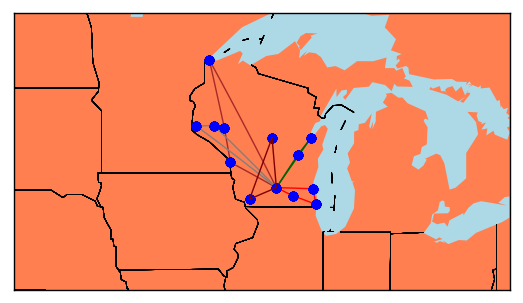

In [14]:
subtours = []
for k in 1:13
    push!(subtours,getAllSubtours(sol1[:,:,k])) 
    #display(subtours)
    mapSolution(sol1[:,:,k],k)
end

The blue dots in this plot and the following two plots represent the customers (cities) we need to serve. The lines connecting them are the routes that each truck takes. Different routes are distinguished in different colors. For example, the red line is a truck leaving from Madison, serving Milwaukee, Parkside, Whitewater and back to Madison.    

Assumptions of Scenario 1:      
Single type of item, single truck size, the time window of each customer MUST be met, arriving earlier or later is not allowed.       
To fulfill the requirement in this scenario, we use five trucks in total and the overall travelling time is 27.96 h.

The path solution is:

Truck 1:  Madison(plant) -> Milwaukee -> Parkside -> Whitewater -> Madison(plant)  
Truck 2:  Madison(plant)  -> Oshkosh -> Green Bay -> Madison(plant)     
Truck 5:  Madison(plant)  -> La Crosse -> Eau Claire -> Superior -> Madison(plant)   
Truck 9:  Madison(plant)  -> River Falls -> Stout -> Madison(plant)   
Truck 13:  Madison(plant)  -> Platteville -> Stevens Point -> Madison(plant)  

While minimizing the total traveling cost is proportional to travelilng distance, we also add the sum of arriving time for each place into the minimized objective as tradeoff in hope to minimize the arriving time in the time window as well as the traveling cost. Otherwise, without the tradeoff, the driver could arrive anytime they wish as long as it's in the time window. In which case, there is possibility that drivers may waste their time on the road.   

We make the regularization parameter as one since we put the same weight on these two objectives. It's focusing on minimizing traveling time while making arriving time as small as possible. In real life, it is the company's option to whether increase or decrease this parameter depending on its policies. By decreasing the ratio of travelling and arriving time (decreasing $\lambda_{time}$, making arriving time less important), the solution is not affected. This permits until the arriving time to traveling time ratio is increased to around 5. Hence, we can conclude that the solution is not sensitive to the $\lambda_{time}$ parameter.     

#### Result of scenario 2

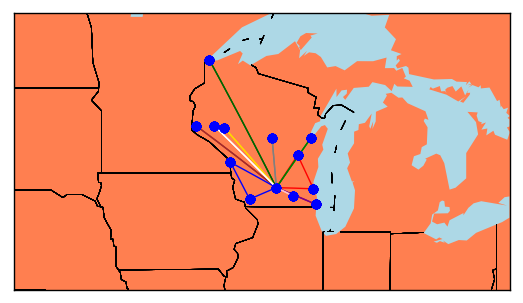

In [436]:
subtours = []
for k in 1:13
    push!(subtours,getAllSubtours(sol2[:,:,k]))  # get cycle containing Atlanta
    #display(subtours)
    mapSolution(sol2[:,:,k],k)
end



Assumptions for Scenario 2:     
Multiple types of items with different weights delivered by different types of trucks, each truck has its own weight limitations.    

To fulfill the requirement in this scenario, we use 10 trucks and the total travelling time spent is 45.33 h. Compared to scenario 1, we use five more trucks while the smallest truck capability in this scenario is five units more than the unified truck capacity in first scenario. This is reasonable since the total demand weight is 205 units which is way more than 41 units in scenario 1.    

The path solution is:

Truck 1:  Madison(plant) -> Milwaukee -> Oshkosh -> Madison(plant)  
Truck 2:  Madison(plant) -> Superior -> Madison(plant)  
Truck 3:  Madison(plant) -> Eau Claire -> Madison(plant)  
Truck 5:  Madison(plant) -> River Falls -> Madison(plant)  
Truck 6:  Madison(plant) -> La Crosse -> Platteville -> Madison(plant)   
Truck 8:  Madison(plant) -> Green Bay -> Madison(plant)  
Truck 9:  Madison(plant) -> Stevens Point -> Madison(plant)  
Truck 10:  Madison(plant) -> Stout -> Madison(plant)  
Truck 11:  Madison(plant) -> Parkside -> Madison(plant)  
Truck 12:  Madison(plant) -> Whitewater -> Madison(plant)  

By looking at the result, we can tell only two trucks out of ten serve multiple customers in one trip. The other eight trucks only serve one customer in each route. This reveals the challenge that the company's facing -- to exactly meet the customer's time window, lots of truck only have one destination per trip, which would lead to not only a large truck fixed cost but also the lack of truck in the end while the demand increases.     

To solve the problem, we have scenario 3 which allows tradeoffs between traveling time and delayed arriving time. With the allowance of delay, the company wouldn't need infinite number of trucks just to meet the customers' time window.     

#### Result of scenario 3

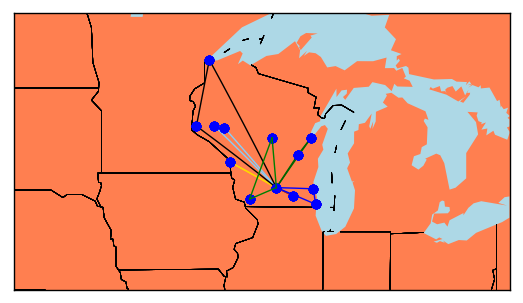

In [435]:
subtours = []
for k in 1:8
    push!(subtours,getAllSubtours(sol3[:,:,k]))  # get cycle containing Atlanta
    #display(subtours)
    mapSolution(sol3[:,:,k],k)
end

Assumptions of Scenario 3:     
Allows arriving outside of the time window. If the truck arrives earlier, the delivery person must wait until the time window starts to deliver. If the delivery person arrives later than the time window, a compensation has to be made.  Longer the delay, more compensation cost has to be paid. Thus, forming a tradeoff between the driving distance cost and delay compensation cost.    

In this scenario, we relax the constraint on time window. We allow the truck to arrive at each customer later than the time window. This reduces the used truck number from ten to seven with all customers demand fulfilled as well. Out of the seven trucks, only two of them serve one customer per trip. This means this tradeoff not only reduces the number of trucks used but also improves the number of customers a truck serves per route.  

To fulfill the requirement in this scenario, the total travelling time spent is 32.0 h.

The path solution is:

Truck 2:  Madison(plant) -> Oshkosh -> Green Bay -> Madison(plant)  
Truck 3:  Madison(plant) -> La Crosse -> Madison(plant)  
Truck 4:  Madison(plant) -> Eau Claire -> Stout -> Madison(plant)  
Truck 5:  Madison(plant) -> Whitewater -> Madison(plant)  
Truck 6:  Madison(plant) -> Milwaukee -> Parkside -> Madison(plant)  
Truck 7:  Madison(plant) -> River Falls -> Superior -> Madison(plant)  
Truck 8:  Madison(plant) -> Platteville -> 1Stevens Point -> Madison(plant)  

The penalty weight we put to the violation of the time window is 1, which means we put the same weight on the travelling time, arriving time at each customer and time window violation. In real case, the weight could be adjusted at the company's autonomy. For example, if the company deems delayed delivery as not a problem, then it may reduce the weight on the violation to ease the penalty.     

By changing the parameter, we can tell the solution is not sensitive since it leads to the same result while the ratio for delay time to traveling time parameter is between 0.01 to 100. We can say that the model finds a nice balance between delay compensation cost and truck traveling cost since the optimality exists within a wide range of parameter ratio. This is partially because the rush order from milwaukee can't be meet one hour after 8:00 AM (start serving time). However, in this project, we don't go in deepth on this direction.

## 5. Conclusion ##

We discuss the Vehicle Routing Problem with Time Windows (VRPTW) with different extensions in the e-commerce delivery case. We organize our project in the way from the simple scenario to a more sophisticated one with trade-offs, in order to explore the real-life application of VRPTW in a systematic way.     

From the results and discussions we make in part 4, we notice that apart from the variation of of our objective values in different scenarios, which is the total time consumed, a new truck may be dispatched due to 3 different reasons: (1) Matching time window for customer (2) Preventing trucks from overload, and (3) Minimizing routing distance.

The relationship between these conditions are something we haven't discussed about. Besides, the fixed cost for truck is also important but we put it aside while making assumptions. These could be a direction which we can work on in the future such as optimizing the utilization of trucks to reduce the fixed cost. Moreover, there are other extensions we can further include, for example, we could set the violation of time window in scenario 3 is only allowed for non-VIP customers, and for VIP customers, time window violation is prohibited to ensure higher service level to our VIP customers and encourage more people to join VIP.